<a href="https://colab.research.google.com/github/myungjinma/acorn_python/blob/main/0727_55%EC%9D%BC%EC%B0%A8_ML(true_func%2C_degrees%2C_pipeline%2C_L1%2C_L2_norm)%2Cboston(ridge%2C_neg_mse_scores%2C_rmse_scores%2C_avg_rmse%2C_alpha).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [33]:
def true_func(X):
  return np.cos(1.5 * np.pi * X)

In [34]:
np.random.rand(4)

array([0.19658236, 0.36872517, 0.82099323, 0.09710128])

In [35]:
np.random.seed(0)
n_samples =30
X = np.sort(np.random.rand(n_samples))

In [36]:
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [37]:
X.shape

(30,)

In [38]:
y = true_func(X) + np.random.randn(n_samples) * 0.1

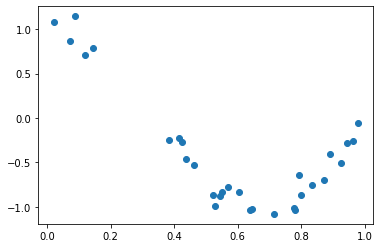

In [39]:
plt.scatter(X, y)

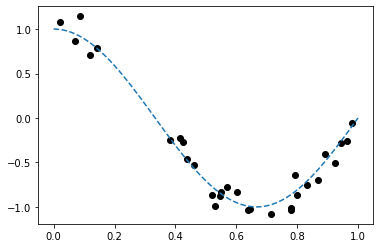

In [40]:
X_test = np.linspace(0,1, 100)
y_test = true_func(X_test)
plt.scatter(X, y , c='k')
plt.plot(X_test, y_test, '--', label="True function")

In [41]:
degrees = [1, 4, 15]  #15차 항 까지 고려

In [42]:
result = {}
for i in degrees :
  pipeline = Pipeline([("polynomial_features", PolynomialFeatures(degree=i, include_bias = False)),
                      ("linear_regression", LinearRegression())])
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
  pipeline.fit(X.reshape(-1, 1),y)
  result[i] = (pipeline, -scores.mean(), scores.std())

In [43]:
result

{1: (Pipeline(steps=[('polynomial_features',
                   PolynomialFeatures(degree=1, include_bias=False)),
                  ('linear_regression', LinearRegression())]),
  0.4077289625098685,
  0.4254685884064717),
 4: (Pipeline(steps=[('polynomial_features',
                   PolynomialFeatures(degree=4, include_bias=False)),
                  ('linear_regression', LinearRegression())]),
  0.04320874987232072,
  0.07077938529772176),
 15: (Pipeline(steps=[('polynomial_features',
                   PolynomialFeatures(degree=15, include_bias=False)),
                  ('linear_regression', LinearRegression())]),
  180526263.3177066,
  541566374.0840327)}

In [44]:
for i in result :
  w = result[i][0].named_steps['linear_regression'].coef_
  s = result[i][1]
  print(f''' degree={i}의 MSE : {s:.2e}''')
  print(f''' degree={i}의 회귀 계수 \n {w} ''')
  print()

 degree=1의 MSE : 4.08e-01
 degree=1의 회귀 계수 
 [-1.60931179] 

 degree=4의 MSE : 4.32e-02
 degree=4의 회귀 계수 
 [  0.46754142 -17.78954475  23.5926603   -7.26289872] 

 degree=15의 MSE : 1.81e+08
 degree=15의 회귀 계수 
 [-2.98291188e+03  1.03898766e+05 -1.87415056e+06  2.03715125e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 



In [45]:
i

15

In [46]:
#w 값
result[i][0].named_steps['linear_regression'].coef_

array([-2.98291188e+03,  1.03898766e+05, -1.87415056e+06,  2.03715125e+07,
       -1.44872551e+08,  7.09311979e+08, -2.47064676e+09,  6.24558367e+09,
       -1.15676035e+10,  1.56894317e+10, -1.54005437e+10,  1.06456871e+10,
       -4.91375763e+09,  1.35919168e+09, -1.70380199e+08])

In [47]:
#s값
result[i][0]

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('linear_regression', LinearRegression())])

In [48]:
#예측값 보기

In [49]:
for i in result :
  pipelines = result[i][0]
  pred = pipelines.predict(X_test[:, np.newaxis])
  print(pred)

[ 5.36680330e-01  5.20424656e-01  5.04168981e-01  4.87913306e-01
  4.71657632e-01  4.55401957e-01  4.39146282e-01  4.22890608e-01
  4.06634933e-01  3.90379258e-01  3.74123584e-01  3.57867909e-01
  3.41612234e-01  3.25356560e-01  3.09100885e-01  2.92845210e-01
  2.76589536e-01  2.60333861e-01  2.44078186e-01  2.27822512e-01
  2.11566837e-01  1.95311162e-01  1.79055488e-01  1.62799813e-01
  1.46544138e-01  1.30288464e-01  1.14032789e-01  9.77771145e-02
  8.15214398e-02  6.52657651e-02  4.90100905e-02  3.27544158e-02
  1.64987412e-02  2.43066497e-04 -1.60126082e-02 -3.22682828e-02
 -4.85239575e-02 -6.47796321e-02 -8.10353068e-02 -9.72909815e-02
 -1.13546656e-01 -1.29802331e-01 -1.46058005e-01 -1.62313680e-01
 -1.78569355e-01 -1.94825029e-01 -2.11080704e-01 -2.27336379e-01
 -2.43592053e-01 -2.59847728e-01 -2.76103403e-01 -2.92359077e-01
 -3.08614752e-01 -3.24870427e-01 -3.41126101e-01 -3.57381776e-01
 -3.73637451e-01 -3.89893125e-01 -4.06148800e-01 -4.22404475e-01
 -4.38660149e-01 -4.54915

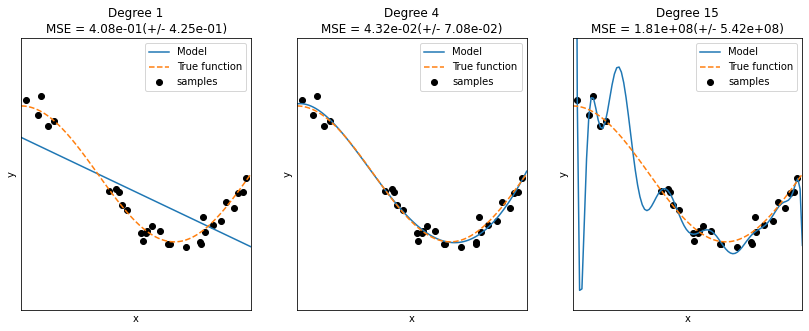

In [50]:
#그래프 그리기
plt.figure(figsize=(14,5))
j = 0
for i in result:
  pipelines = result[i][0]
  mean_score = result[i][1]
  std_score = result[i][2]
  pred = pipelines.predict(X_test[:, np.newaxis])
  j+=1
  ax = plt.subplot(1, len(degrees), j)
  plt.plot(X_test, pred, label = 'Model')
  plt.scatter(X, y , c= 'k', label = 'samples')
  plt.plot(X_test, y_test, '--', label = 'True function')
  plt.xlim((0,1))
  plt.ylim((-2, 2))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend(loc='best')
  plt.title(f'''Degree {i}\nMSE = {mean_score:.2e}(+/- {std_score:.2e})''')
  plt.setp(ax, xticks=(), yticks=())

1. 모델 단수  - 데이터를 제대로 표현하지 못하고 있다. 데이터에 적합된 정도가 작다. 과소 적합

왼쪽상단의 예측값은 실제값에 비해 아래로 치우쳐져 있고, 오른쪽 하단은 위로 치우쳐져 있다. 

편향이 큰 모델

2. 모델 적절

3. 모델 복잡 - 모든 데이터를 표현하였지만, 새로운 데이터가 있을경우 잘못된 예측을 나타낸다 - 과대적합

편향이 너무 높으면 전체 오류가 높다.

편향을 낮추면 분산이 높아지지만 전체오류는 낮아진다.

편향을 더 낮추고 분산이 높아지면 전체 오류가 높아진다.

#최적화  = RSS 최소화 하기 + 회귀계수 제어하기

$$
L_R(w) = RSS + α||X||_p
$$

$$RSS = \sum(y_i - y_i)^2 = \sum (y_i - (w_i × x + w_0))^2$$

의 식을 일반화 하면,

$$L(w) = {1 \over 2} \sum(y_i - \0 (w))^2$$

노름은 다음과 같이 정의된다

$$||X||_p = (\sum_{i=1,d}|x_i|^p) ^{1 \over p}$$

노름 예제를 들어 알아보자

$$X = (3, -4, 1)$$
$$
||X||_3 = (3^2 + |-4|^2 + 1^2)^{1/2} = 5.099
$$

$$
||X||_3 = (3^3 + |-4|^3 +1^3)^{1/3} = 4.514
$$

Euclidean norm 
$$unit vector = {x \over ||x||_2}$$

#P 값으로 1과 2를 주로 사용하며, 각각 L1노름,  L2 노름 이라 부른다.

L(W) 를 적절히 수정(규제, Regularization)하기 위해 다음과 같은 두 식을 사용한다.

L1 노름:
$$L_R(w) = L(w) + α∑^{d}_{j=1} |w_j|$$
L2 노름:
$$L_R(w) = L(w) + α∑^{d}_{j=1} w^2_j$$

alpha의 의미

alpha 가 작을 경우, 
$$L_R(W)  L(W)$$

alpha 가 클 경우 
$$RSS (W) << ||X||
_p$$

비용함수를 최소화하기 위해서는 W가 0에 가까운 값이 되어야한다.

L1 norm : 라쏘회귀 : 회귀 계수를 0으로 만들어 불필요한 회귀계수는 삭제 -> 회귀계수 선택

L2 norm : 릿지 회귀 : 회귀 계수를 감소싯키나 0으로 만들지는 않음


In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd

# boston 데이타셋 로드
from sklearn import datasets
boston = datasets.load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

Boston 데이타셋 크기 : (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [55]:
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [28]:
alphas = [0, 0.1, 1, 10, 100]

In [56]:
for i in alphas:
  ridge = Ridge(alpha =i)
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print(i, ':', avg_rmse)

0 : 5.828658946215809
0.1 : 5.7884866270324125
1 : 5.652570965613546
10 : 5.518166280868968
100 : 5.329589628472143


In [57]:
for alpha in alphas:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)
  coeff = pd.Series(data = ridge.coef_, index= X_data.columns)
  print('-----', alpha, '-----')
  print(coeff)

----- 0 -----
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64
----- 0.1 -----
CRIM       -0.107474
ZN          0.046572
INDUS       0.015999
CHAS        2.670019
NOX       -16.684645
RM          3.818233
AGE        -0.000269
DIS        -1.459626
RAD         0.303515
TAX        -0.012421
PTRATIO    -0.940759
B           0.009368
LSTAT      -0.525966
dtype: float64
----- 1 -----
CRIM       -0.104595
ZN          0.047443
INDUS      -0.008805
CHAS        2.552393
NOX       -10.777015
RM          3.854000
AGE        -0.005415
DIS        -1.372654
RAD         0.290142
TAX        -0.012912
PTRATIO    -0.876074
B           0.009673
LSTAT      -0.533343
dtype: float64
----- 10 -----
CRIM      -0.101435
ZN         0.049579
INDUS     -0.042962
CHAS       1.9520

In [59]:
import seaborn as sns

In [62]:
def alpha_w_plot(alpha, coeffs, pos, fig, axes):
  plot_title = 'alpha : ' + str(alpha)
  coeff = coeffs.sort_values(ascending = False)
  axes[pos].set_title(plot_title)
  axes[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y = coeff.index, ax= axes[pos])

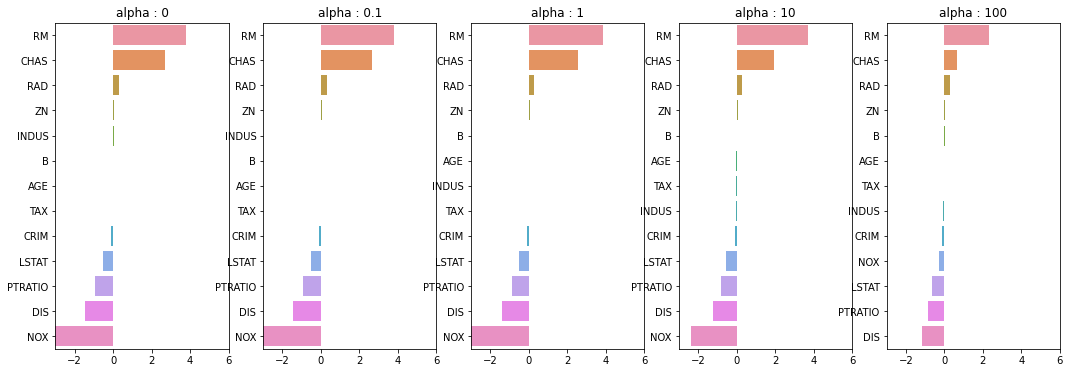

In [63]:
fig, axes = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)
  coeff = pd.Series(data = ridge.coef_, index= X_data.columns)
  alpha_w_plot(alpha, coeff, pos, fig, axes)